In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('spam.csv' , encoding='ISO-8859-1')

In [2]:
df.describe()

,email,label
count,179,179
unique,150,2
top,You've been selected for a free trial of our p...,ham
freq,4,100


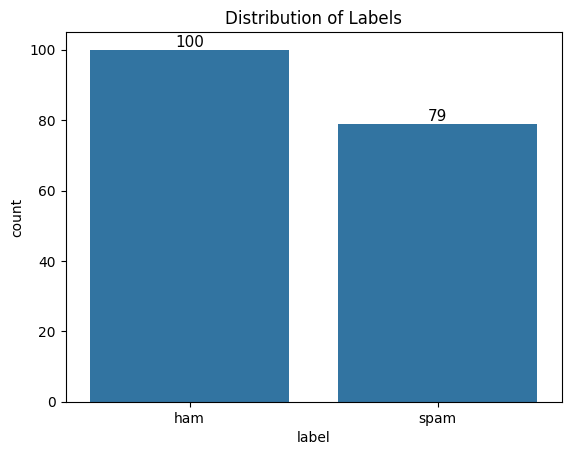

In [3]:
# # Distribution of labels
sns.countplot(x='label', data=df)
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Labels')
plt.show()

The distribution of email labels in the dataset is balanced, with around equal percentages of spam and non-spam (ham) emails. To train strong classification models free from bias towards a specific class, this balance is necessary.

In [4]:
# Text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

# Tokenization
df['email'] = df['email'].apply(lambda x: word_tokenize(x.lower()))

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['email'] = df['email'].apply(lambda x: [word for word in x if word not in stop_words])

# Join the tokens back to form text
df['email'] = df['email'].apply(lambda x: ' '.join(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


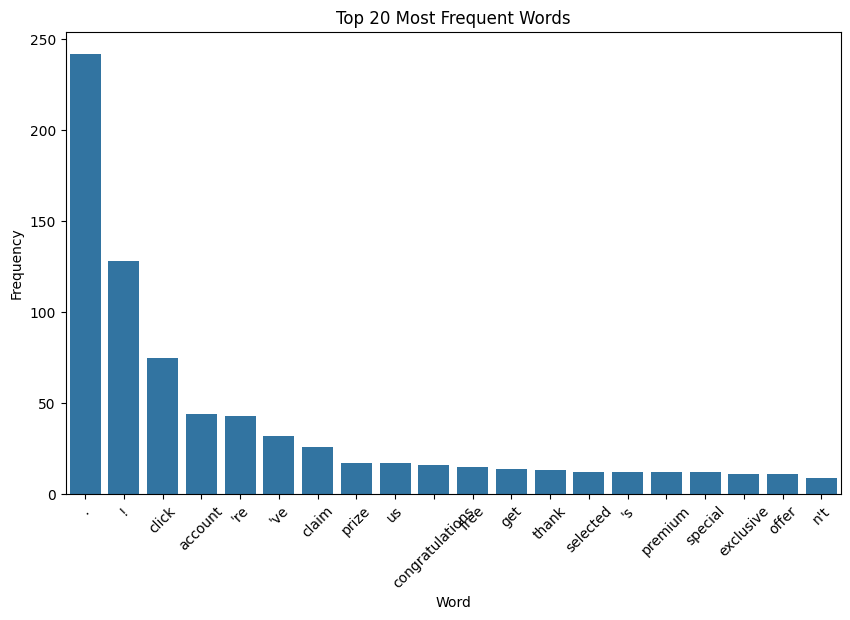

In [5]:
# Word frequency analysis
from collections import Counter

# Tokenize the text again
df['email'] = df['email'].apply(lambda x: word_tokenize(x))

# Flatten the list of tokens
all_words = [word for sublist in df['email'] for word in sublist]

# Count word frequency
word_freq = Counter(all_words)

# Convert to DataFrame for visualization
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])

# Sort by frequency
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Visualize top 20 most frequent words
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Frequency', data=word_freq_df.head(20))
plt.title('Top 20 Most Frequent Words')
plt.xticks(rotation=45)
plt.show()

The most common terms in the dataset shed light on the vocabulary and grammatical usage in emails that are not spam and those are. The goal of additional research could be to pinpoint crucial terms or expressions that set the two classes apart, thus increasing classification precision.

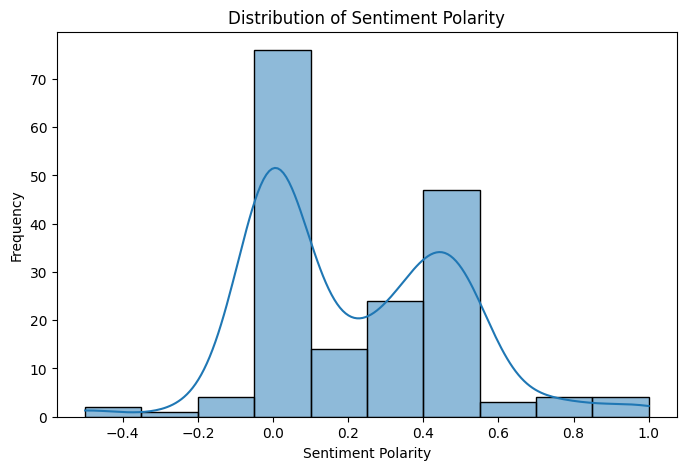

In [6]:
from textblob import TextBlob

# Convert lists in 'email' column to strings
df['email'] = df['email'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Calculate sentiment polarity
df['sentiment'] = df['email'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualize sentiment distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['sentiment'], kde=True)
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

Though sentiment analysis indicates the general sentiment polarity of the emails, the dataset primarily focuses on email classification. Additional context regarding the messages' tone or intent can be obtained from this analysis, which could be helpful for some classification tasks.

**Modeling **
Natural language processing (NLP) models can be developed and improved for email categorization tasks using the dataset. By utilising the knowledge gathered from the data analysis, strategies like logistic regression, naive Bayes, and neural networks can be used to create efficient classification models.

**Logistic Regression**

Accuracy: 0.9722222222222222
Precision: 0.9565217391304348
Recall: 1.0
F1 Score: 0.9777777777777777

Confusion Matrix:
 [[13  1]
 [ 0 22]]


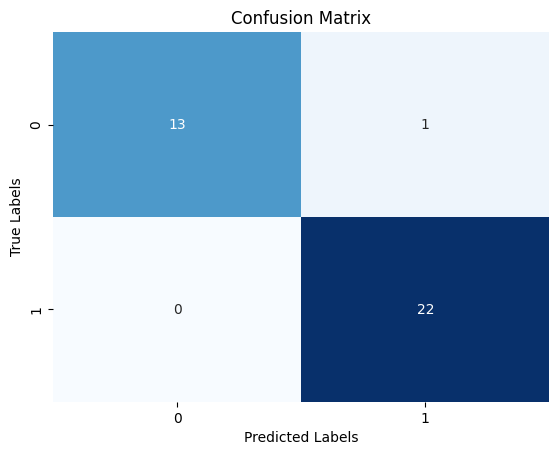


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.96      1.00      0.98        22

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36



In [7]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('spam.csv')
# Preprocess the data: Encode the labels
df['spam'] = df['label'].apply(lambda x: 1 if x == 'spam' else 0)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['email'], df['spam'], test_size=0.2, random_state=42)

# Convert text data into numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize and train logistic regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_vec, y_train)

# Predictions on the test set
y_pred = logistic_regression.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nConfusion Matrix:\n", conf_matrix)

# Plotting confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


**SVM**

SVM Performance:
Accuracy: 0.9722222222222222
Precision: 0.9565217391304348
Recall: 1.0
F1 Score: 0.9777777777777777

Confusion Matrix:
 [[13  1]
 [ 0 22]]


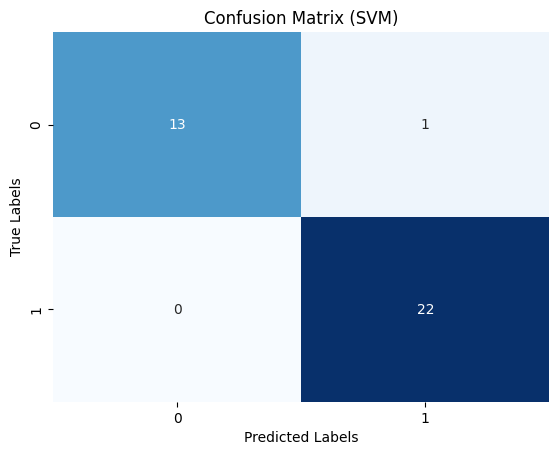


Classification Report (SVM):
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.96      1.00      0.98        22

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36



In [8]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('spam.csv')

# Preprocess the data: Encode the labels
df['spam'] = df['label'].apply(lambda x: 1 if x == 'spam' else 0)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['email'], df['spam'], test_size=0.2, random_state=42)

# Convert text data into numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize and train SVM model
svm = SVC()
svm.fit(X_train_vec, y_train)

# Predictions on the test set
y_pred_svm = svm.predict(X_test_vec)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print("SVM Performance:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)
print("\nConfusion Matrix:\n", conf_matrix_svm)

# Plotting confusion matrix for SVM
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (SVM)')
plt.show()

# Classification report for SVM
print("\nClassification Report (SVM):\n", classification_report(y_test, y_pred_svm))

**Naive Bayes**

Naive Bayes Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Confusion Matrix:
 [[14  0]
 [ 0 22]]


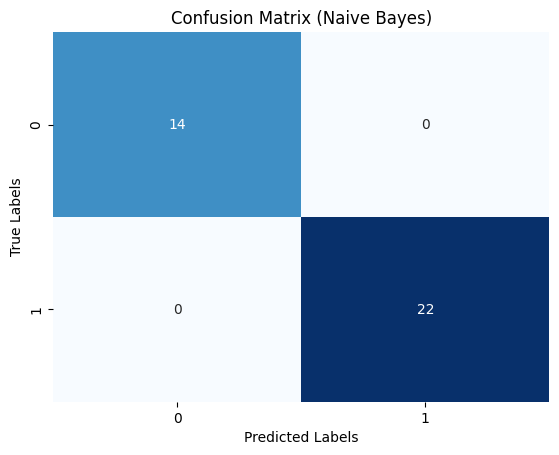


Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        22

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [9]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('spam.csv')

# Preprocess the data: Encode the labels
df['spam'] = df['label'].apply(lambda x: 1 if x == 'spam' else 0)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['email'], df['spam'], test_size=0.2, random_state=42)

# Convert text data into numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize and train Naive Bayes model (MultinomialNB)
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vec, y_train)

# Predictions on the test set
y_pred_nb = naive_bayes.predict(X_test_vec)

# Evaluate the Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

print("Naive Bayes Performance:")
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1 Score:", f1_nb)
print("\nConfusion Matrix:\n", conf_matrix_nb)

# Plotting confusion matrix for Naive Bayes
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Naive Bayes)')
plt.show()

# Classification report for Naive Bayes
print("\nClassification Report (Naive Bayes):\n", classification_report(y_test, y_pred_nb))


**BERT  (LLM)**



In [10]:
!pip install accelerate -U


In [11]:
!pip install transformers


In [12]:
!pip install torch torchvision torchaudio


In [13]:
!pip install scikit-learn


In [14]:
!pip install accelerate>=0.21.0


In [15]:
# Step 1: Install or upgrade transformers if necessary
!pip install transformers

# Step 2: Import necessary libraries
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Step 3: Load
df = pd.read_csv('spam.csv')

# Step 4: Preprocess the data: Encode the labels
df['spam'] = df['label'].apply(lambda x: 1 if x == 'spam' else 0)

# Step 5: Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['email'], df['spam'], test_size=0.2, random_state=42)

# Step 6: Initialize BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # num_labels=2 for binary classification

# Step 7: Tokenize inputst
train_encodings = tokenizer(list(X_train), truncation=True, padding=True)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True)

# Step 8: Convert inputs to PyTorch tensors
train_dataset = torch.utils.data.TensorDataset(
    torch.tensor(train_encodings['input_ids']),
    torch.tensor(train_encodings['attention_mask']),
    torch.tensor(y_train.values)
)

test_dataset = torch.utils.data.TensorDataset(
    torch.tensor(test_encodings['input_ids']),
    torch.tensor(test_encodings['attention_mask']),
    torch.tensor(y_test.values)
)

# Step 9: Define training parameters
batch_size = 8
epochs = 3
learning_rate = 2e-5

optimizer = AdamW(model.parameters(), lr=learning_rate, eps=1e-8)
total_steps = len(train_dataset) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Step 10: Training loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True):
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)  # Gradient clipping to prevent exploding gradients

        optimizer.step()
        scheduler.step()

    avg_train_loss = total_loss / len(train_dataset)

    # Step 11: Evaluation
    model.eval()
    predictions = []
    true_labels = []

    for batch in torch.utils.data.DataLoader(test_dataset, batch_size=batch_size):
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1)

        predictions.extend(preds.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

    # Step 12: Calculate evaluation metrics
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    conf_matrix = confusion_matrix(true_labels, predictions)

    print(f"Epoch {epoch + 1}/{epochs}")
    print(f"Average training loss: {avg_train_loss}")
    print("Evaluation metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print()

print("Training completed.")

# Step 13: Classification report
print("\nClassification Report:\n", classification_report(true_labels, predictions))


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/3
Average training loss: 0.05112151311827706
Evaluation metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[14  0]
 [ 0 22]]

Epoch 2/3
Average training loss: 0.01946971523803431
Evaluation metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[14  0]
 [ 0 22]]

Epoch 3/3
Average training loss: 0.008362138682937288
Evaluation metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[14  0]
 [ 0 22]]

Training completed.

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        22

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36





```
# This is formatted as code
```

# **Phishing -1 **

In [16]:
!pip install --upgrade scikit-learn

In [17]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # Import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("dataset_phishing.csv")
data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate



Performance of Logistic Regression:
Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.95

Classification Report:
              precision    recall  f1-score   support

  legitimate       0.95      0.95      0.95      1732
    phishing       0.95      0.95      0.95      1697

    accuracy                           0.95      3429
   macro avg       0.95      0.95      0.95      3429
weighted avg       0.95      0.95      0.95      3429



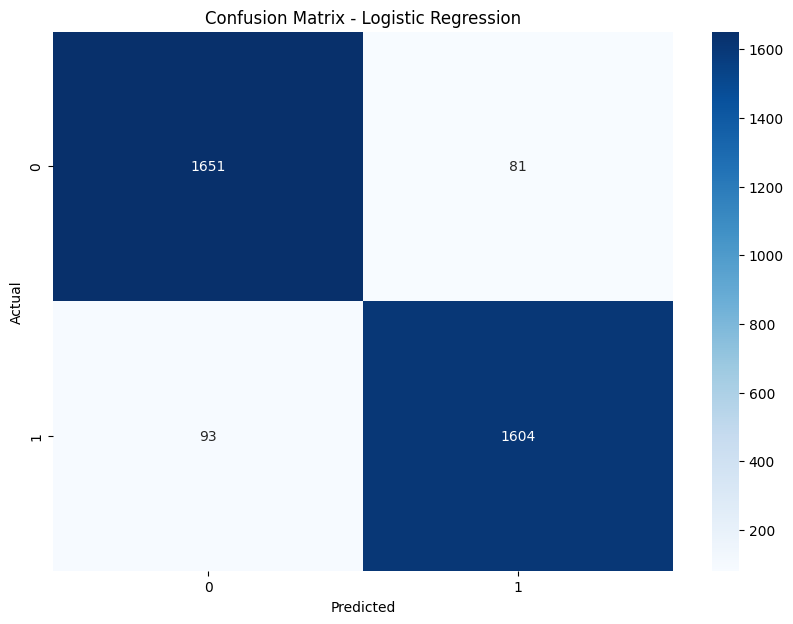


Performance of Decision Tree:
Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93

Classification Report:
              precision    recall  f1-score   support

  legitimate       0.93      0.94      0.93      1732
    phishing       0.93      0.93      0.93      1697

    accuracy                           0.93      3429
   macro avg       0.93      0.93      0.93      3429
weighted avg       0.93      0.93      0.93      3429



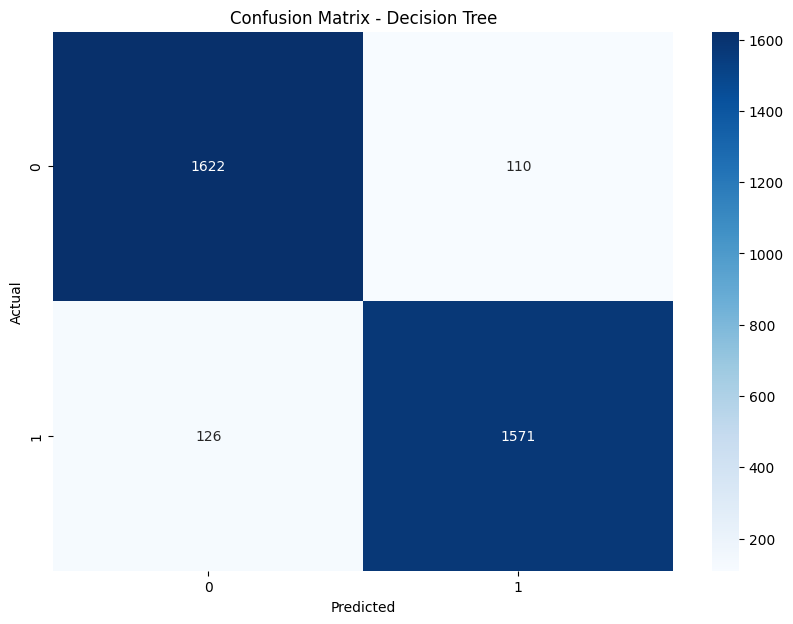


Performance of SVC:
Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96

Classification Report:
              precision    recall  f1-score   support

  legitimate       0.96      0.96      0.96      1732
    phishing       0.96      0.96      0.96      1697

    accuracy                           0.96      3429
   macro avg       0.96      0.96      0.96      3429
weighted avg       0.96      0.96      0.96      3429



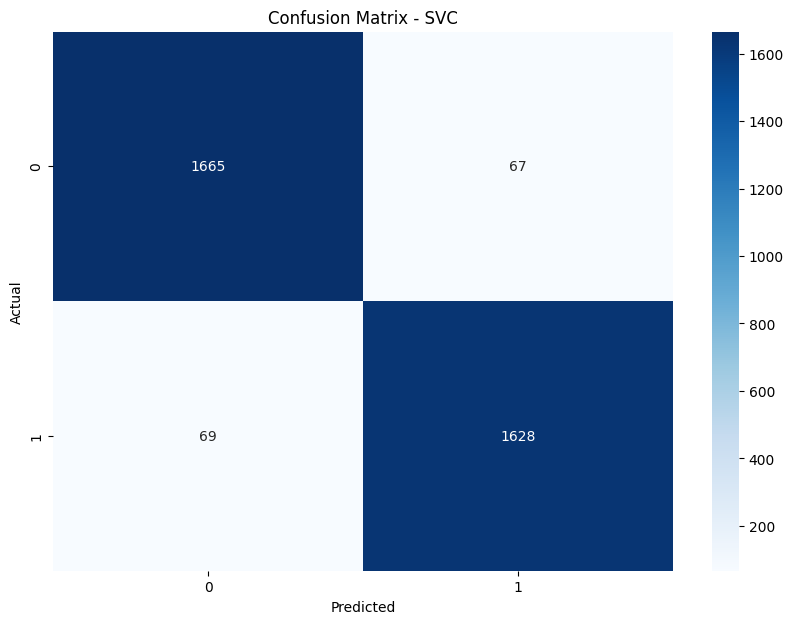

In [18]:
X = data.drop(columns=['url', 'status'])  # Dropping 'url' and the target 'status' from features

# Automatically encode all object (categorical) columns
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Target variable
y = data['status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the classifiers
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Decision Tree': DecisionTreeClassifier(),
    'SVC': SVC(probability=True)
}

# Train and evaluate each classifier
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy and other metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f"\nPerformance of {name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.5930 - loss: 6954.9004 - val_accuracy: 0.7197 - val_loss: 77.1770
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6938 - loss: 899.0353 - val_accuracy: 0.7332 - val_loss: 704.7509
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7174 - loss: 1184.6786 - val_accuracy: 0.7600 - val_loss: 189.6620
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7478 - loss: 1038.5092 - val_accuracy: 0.6979 - val_loss: 1094.4011
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7364 - loss: 1344.4401 - val_accuracy: 0.7364 - val_loss: 264.2847
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7316 - loss: 735.7275 - val_accuracy: 0.7775 - val_loss: 1206.2571
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7655 - loss: 559.2371 - val_accuracy: 0.7439 - val_loss: 353.7125
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.749

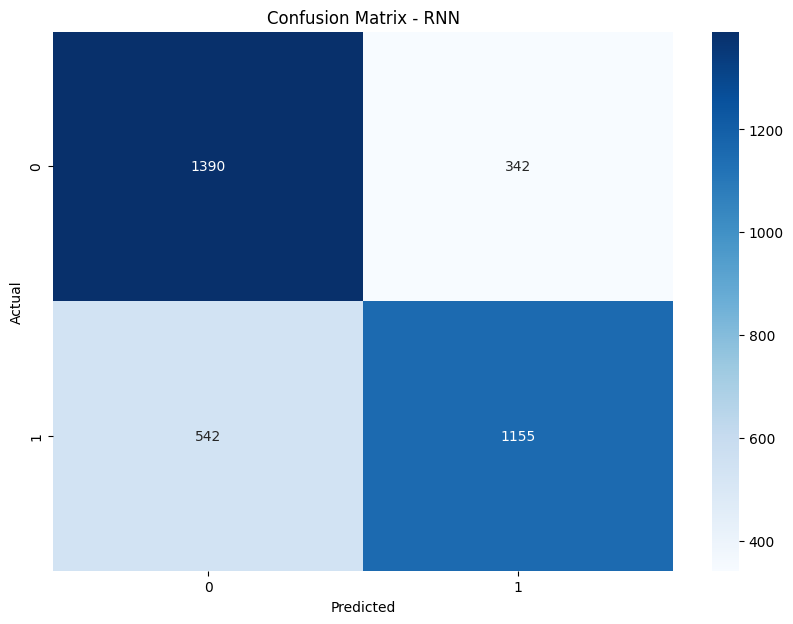

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Encode the target variable if it's categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)


X_reshaped = np.expand_dims(X, axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_categorical, test_size=0.3, random_state=42)

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(y_categorical.shape[1], activation='softmax'))  # Adjust the output layer to match your number of classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Generate predictions
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_true = np.argmax(y_test, axis=1)

# Calculate metrics
precision = precision_score(y_test_true, y_pred, average='macro')
recall = recall_score(y_test_true, y_pred, average='macro')
f1 = f1_score(y_test_true, y_pred, average='macro')

print(f"\nPerformance of RNN:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test_true, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - RNN')
plt.show()


# **Linear Discriminant Analysis (LDA)**

In [20]:
!pip install pytorch-tabular



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.1/778.1 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 40.0 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=95ad8a17e9d564eeb61ada882bbeb682dafa53151da2ce6eb7d21d0d7faef8d1
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bc

In [21]:
!pip install pytorch-lightning

Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1463
           1       0.99      0.99      0.99      1537

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



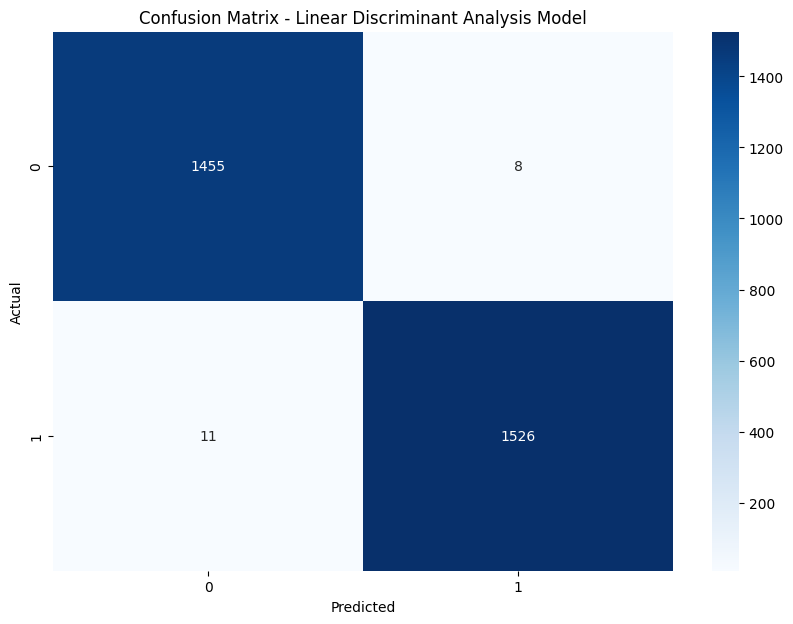

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("Phishing.csv")

# Extract features and target variable
X = data.drop(columns=['CLASS_LABEL'])
y = data['CLASS_LABEL']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features (optional but often beneficial)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Linear Discriminant Analysis model
model = LinearDiscriminantAnalysis()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Linear Discriminant Analysis Model')
plt.show()


In [23]:
!pip install transformers[torch] accelerate -U


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 65.8 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Uninstalling transformers-4.44.2:
      Successfully uninstalled transformers-4.44.2


In [24]:
import transformers
import torch
import accelerate

print(f"Transformers version: {transformers.__version__}")
print(f"Torch version: {torch.__version__}")
print(f"Accelerate version: {accelerate.__version__}")


Transformers version: 4.44.2
Torch version: 2.4.1+cu121
Accelerate version: 0.34.2


In [25]:
pip install transformers torch pandas scikit-learn


In [26]:
pip install shap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 10.5 MB/s eta 0:00:00


# **Phishing - 2**

Logistic Regression Accuracy: 0.9558180227471567
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1157
           1       0.96      0.95      0.96      1129

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286



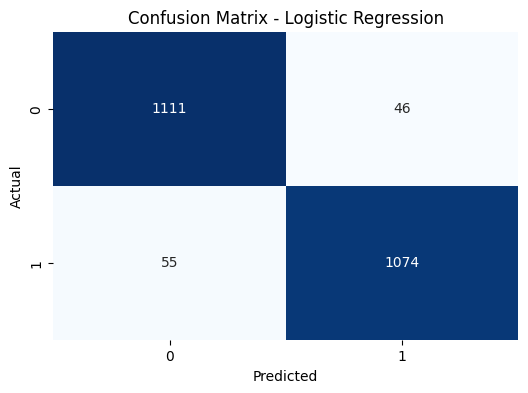

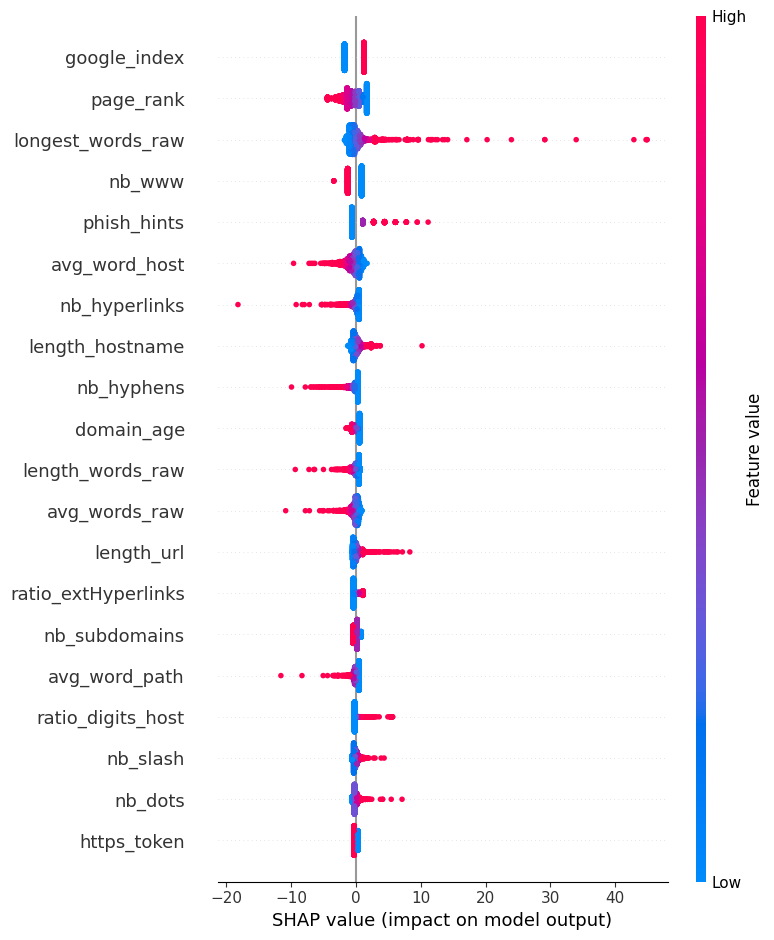

SVM Accuracy: 0.962817147856518
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1157
           1       0.96      0.96      0.96      1129

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286



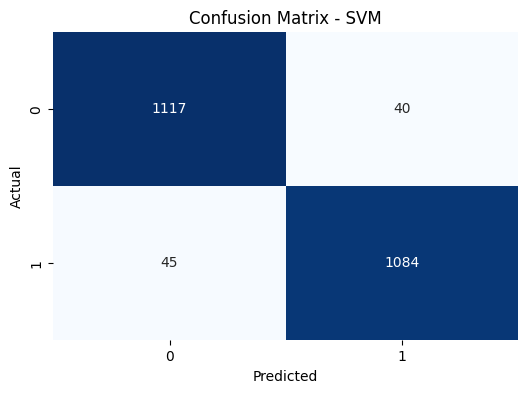

  0%|          | 0/2286 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('dataset_phishing.csv')

# Preprocessing
X = df.drop(columns=['url', 'status'])
y = df['status'].map({'legitimate': 0, 'phishing': 1})

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for traditional ML models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

# Confusion Matrix for Logistic Regression
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# SHAP for Logistic Regression
explainer_log_reg = shap.Explainer(log_reg, X_train_scaled, feature_names=df.drop(columns=['url', 'status']).columns)
shap_values_log_reg = explainer_log_reg(X_test_scaled)
shap.summary_plot(shap_values_log_reg, X_test, feature_names=df.drop(columns=['url', 'status']).columns)

# Support Vector Machine (SVM)
svm = SVC(probability=True)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

# SHAP for SVM using KernelExplainer with a sample of the background dataset
background_sample = shap.sample(X_train_scaled, 100)  # Sampling 100 instances from the training set
explainer_svm = shap.KernelExplainer(svm.predict_proba, background_sample)
shap_values_svm = explainer_svm.shap_values(X_test_scaled)
shap.summary_plot(shap_values_svm, X_test, feature_names=df.drop(columns=['url', 'status']).columns)

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

# SHAP for Naive Bayes
explainer_nb = shap.Explainer(nb, X_train_scaled, feature_names=df.drop(columns=['url', 'status']).columns)
shap_values_nb = explainer_nb(X_test_scaled)
shap.summary_plot(shap_values_nb, X_test, feature_names=df.drop(columns=['url', 'status']).columns)


In [ ]:
pip install accelerate -U


In [ ]:
pip install transformers -U


In [ ]:
!pip list | grep accelerate
!pip list | grep transformers


In [ ]:
pip install transformers[torch]

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("dataset_phishing.csv")

# Extract features and target variable
X = data.drop(columns=['status', 'url'])  # Assuming 'status' is the target variable
y = data['status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features (optional but often beneficial)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Linear Discriminant Analysis model
model = LinearDiscriminantAnalysis()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='phishing')
recall = recall_score(y_test, y_pred, pos_label='phishing')
f1 = f1_score(y_test, y_pred, pos_label='phishing')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Linear Discriminant Analysis Model')
plt.show()
